# IMPORTING THE LIBRARIES

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# TEST AND TRAIN DATA

In [2]:
#Define the parameters/arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
                                 
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train=train_datagen.flow_from_directory(r"C:\Users\sanjay\OneDrive\Desktop\Dataset\Train_set",
target_size=(128,128),
batch_size=32,
class_mode='binary')

Found 436 images belonging to 2 classes.


In [4]:
x_test=test_datagen.flow_from_directory(r"C:\Users\sanjay\OneDrive\Desktop\Dataset\Test_set",
target_size=(128,128),
batch_size=32,
class_mode='binary')

Found 121 images belonging to 2 classes.


# CNN MODEL

In [5]:
#To define linear intialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [6]:
#initializing the model
model=Sequential()
#add convolutional layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

# CONFIGURING AND TRAININGTHE MODEL

In [7]:
#configure the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [8]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,
validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 26s 2s/step - loss: 1.3800 - accuracy: 0.7592 - val_loss: 0.1597 - val_accuracy: 0.9339
Epoch 2/10
14/14 [==============================] - 19s 1s/step - loss: 0.2377 - accuracy: 0.9106 - val_loss: 0.0592 - val_accuracy: 0.9835
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.2193 - accuracy: 0.9060 - val_loss: 0.0650 - val_accuracy: 0.9835
Epoch 4/10
14/14 [==============================] - 25s 2s/step - loss: 0.1632 - accuracy: 0.9335 - val_loss: 0.1118 - val_accuracy: 0.9669
Epoch 5/10
14/14 [==============================] - 21s 2s/step - loss: 0.1669 - accuracy: 0.9358 - val_loss: 0.0705 - val_accuracy: 0.9835
Epoch 6/10
14/14 [==============================] - 19s 1s/step - loss: 0.1586 - accuracy: 0.9243 - val_loss: 0.0502 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 20s 1s/step - loss: 0.1530 - accuracy: 0.9358 - val_loss: 0.0530 - val_accuracy: 0.9835
Epoch 8/10
14/14 [==

In [9]:
model.save("forest2.h5")

# IMAGE PREDICTION

In [10]:
#import load_model fromkeras.model 
from keras.models import load_model
 #import image class from keras
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [11]:
model = load_model("forest2.h5")

In [12]:
img=image.load_img(r"C:\Users\sanjay\OneDrive\Desktop\Dataset\Test_set\Forest with fire\599857.jpg")
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [13]:
pred=model.predict(x)

1/1 [==============================] - 0s 188ms/step


In [14]:
x_train.class_indices

{'Forest': 0, 'Forest with fire': 1}

In [16]:
img
if (pred[0]>0.5):
    print("forest with fire")
else:
    print("forest without fire")

forest with fire


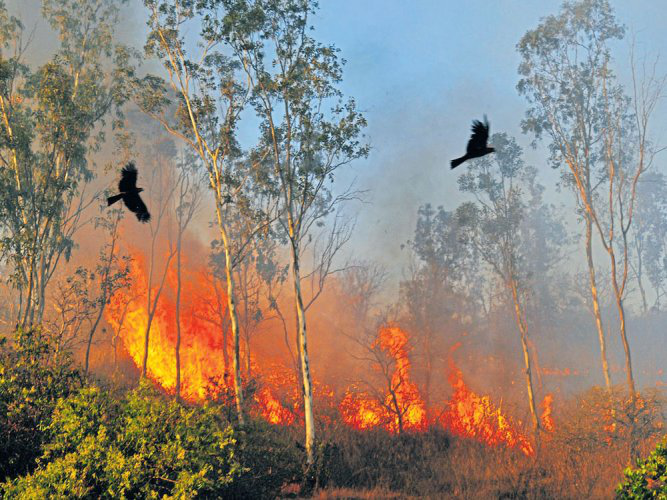

In [17]:
img

1/1 [==============================] - 0s 157ms/step


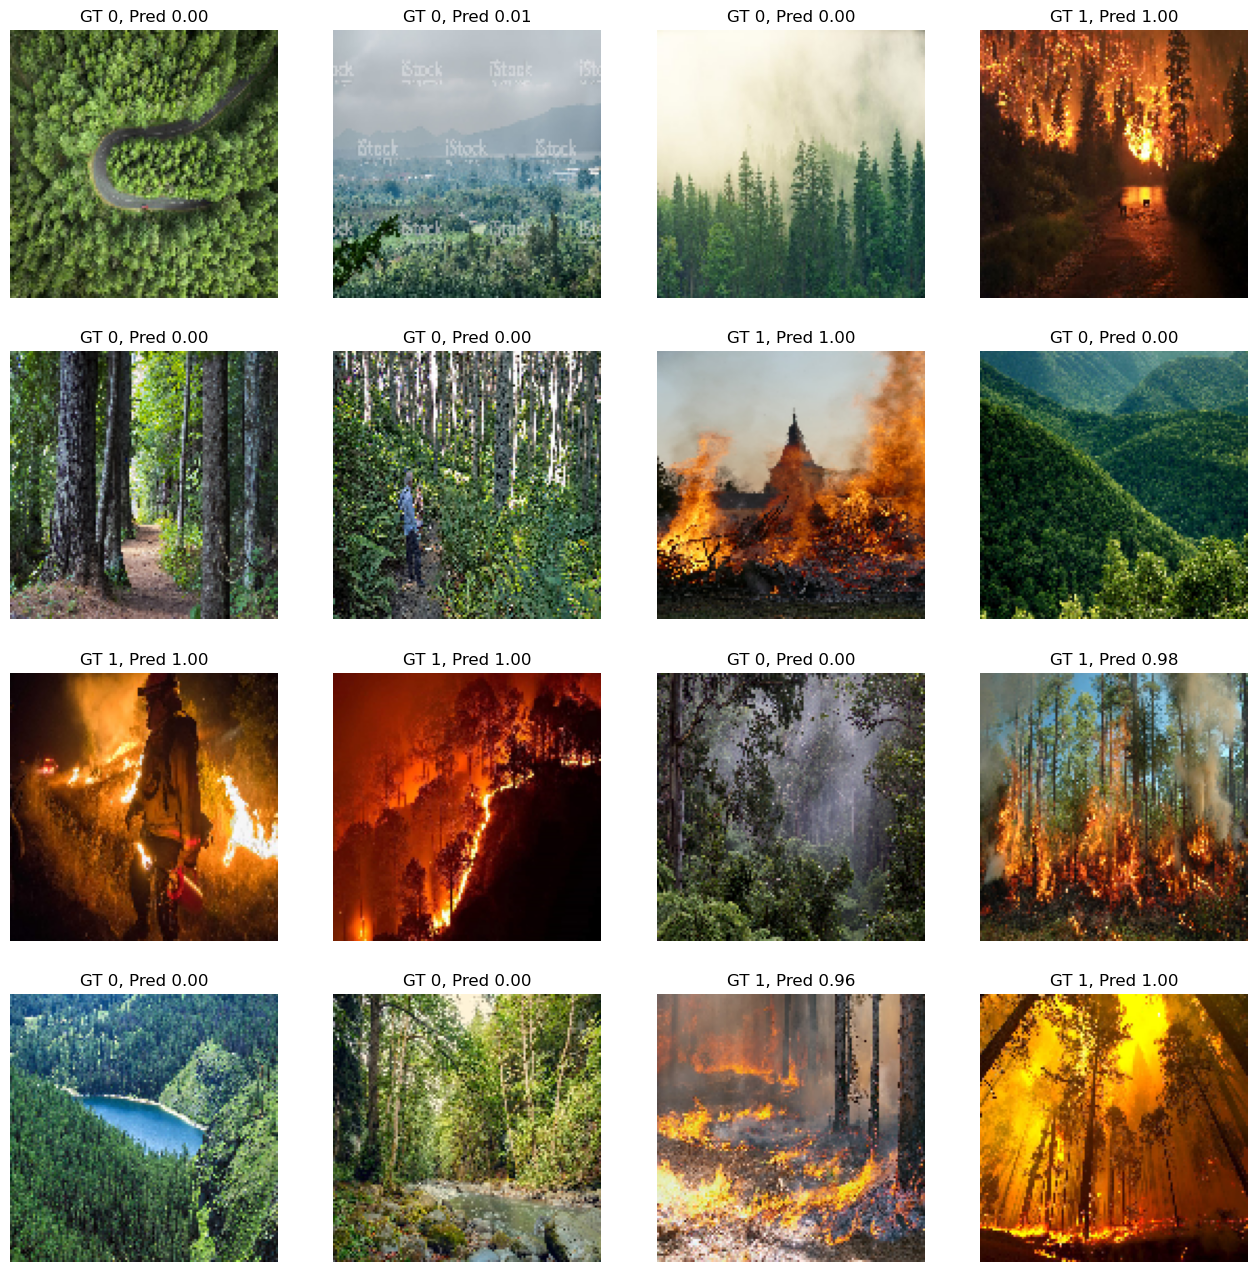

In [18]:
import matplotlib.pyplot as plt

val_imgs, val_labels = x_test.__getitem__(0)

preds = model.predict(val_imgs)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for img, label, pred, ax in zip(val_imgs, val_labels, preds, axes.flatten()):
    ax.imshow(img)
    ax.set_title('GT %d, Pred %.2f' % (label, pred))
    ax.set_axis_off()

# OPENCV FOR VIDEO PROCESSING

In [19]:
import cv2
#import facevec
import numpy as np
import smtplib
from tensorflow.keras.utils import load_img,img_to_array 
from keras.models  import load_model
from twilio.rest import Client

In [21]:
model = load_model(r'forest2.h5') 
video = cv2.VideoCapture(r"C:\Users\sanjay\Downloads\pexels-arnav-kainthola-7543653.mp4")
name = ['forest','with fire']
    
while(1):
    success, frame = video.read()
    cv2.imwrite("image.jpg",frame)
    img = load_img("image.jpg")
    x  = img_to_array(img)
    res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    x = np.expand_dims(res,axis=0)
    pred=model.predict(x)
    if(1>pred[0]):
        p=0
    else:
        p=1
    print(p)
    print(pred)
    cv2.putText(frame, "predicted  class = " +str(name[p]), (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
    
    
   # pred=model.predict(x)
    if pred[0]==1:
        account_sid = 'AC5923cf8d29ec11edffab37a3997f3602'
        auth_token = '70c0e846d5dd8a8c5ff747a1ceefc75c'
        client = Client(account_sid, auth_token)

        message = client.messages \
        .create(
         body='Forest Fire is detected, stay alert',
         from_='+14793363560',
         to='+918838487815')
        
        print(message.sid)
    
        print('Fire Detected')
        print ('SMS sent!')
        break
    else:
        print("no danger")
       #break
    cv2.imshow("image",frame)
   
    if cv2.waitKey(1) & 0xFF == ord('a'): 
        break

video.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 102ms/step
1
[[1.]]
SMb42c9e1dd1529cb82996789aaaaf1305
Fire Detected
SMS sent!


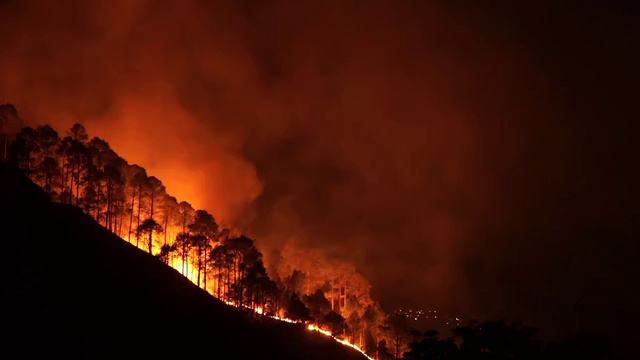

In [22]:
img